In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# color palettes from coolors.co

colors = {'random':'#74D3AE',
           'random dark':'#2C8C67',
           'cellcollective':'#DD9787',
           'cellcollective dark':'#AF4831'
          }

In [3]:
cc_data = pd.read_csv('240123_cell_collective_ck_and_isolated_fp_data.csv')
rand_data = pd.read_csv('240123_random_ck_and_isolated_fp_data.csv')

In [4]:
cc_data[:3]

,name,mean control kernel size,number of attractors,size,number of isolated fixed points
0,Cortical Area Development,1.0,2,5,0.0
1,Cell Cycle Transcription By Coupled CDK And Ne...,1.0,2,9,0.0
2,Mammalian Cell Cycle 2006,0.0,1,10,0.0


In [5]:
rand_data[:3]

,name,mean control kernel size,number of attractors,size,number of isolated fixed points
0,random_6_N10_k2_p0.25_seed738,NaN,4,10,0.0
1,random_30_N10_k2_p0.75_seed3690,0.0,1,10,0.0
2,random_4_N15_k2_p0.25_seed492,1.0,2,15,0.0


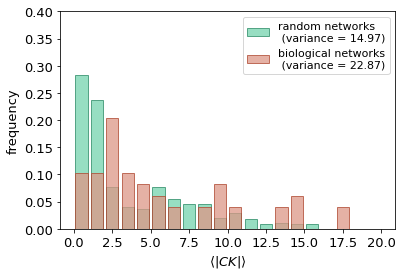

In [18]:
cc = cc_data['mean control kernel size']
rand = rand_data['mean control kernel size']

bins = np.linspace(0, 20, 21)
plt.ylim(0,.4)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks\n (variance = '+'{:.2f}'.format(np.var(rand))+')',
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(cc,bins=bins,density=True,alpha=.75,
         label='biological networks\n (variance = '+'{:.2f}'.format(np.var(cc))+')',
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle $',size=13)
plt.ylabel('frequency',size=13)
plt.xticks(size=13)
plt.yticks(size=13)

plt.legend(fontsize=11)
plt.savefig('ck_dist.pdf')
plt.show()

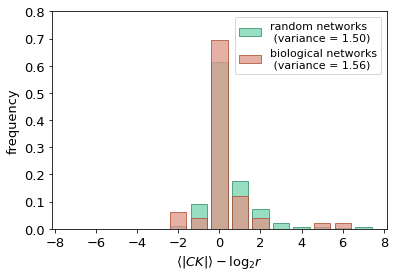

In [16]:
ck = cc_data['mean control kernel size']
r = cc_data['number of attractors']
cc = ck - np.log2(r)

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
rand = ck - np.log2(r)

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks\n (variance = '+'{:.2f}'.format(np.var(rand))+')',
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(cc,bins=bins,density=True,alpha=.75,
         label='biological networks\n (variance = '+'{:.2f}'.format(np.var(cc))+')',
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \log_2 r$',size =13)
plt.ylabel('frequency',size=13)
plt.xticks(size=13)
plt.yticks(size=13)

plt.legend(fontsize=11)
plt.savefig('ck_model1_dist.pdf')
plt.show()

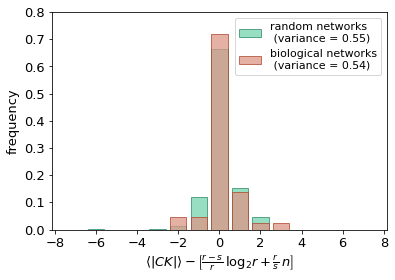

In [17]:
ck = cc_data['mean control kernel size']
r = cc_data['number of attractors']
s = cc_data['number of isolated fixed points'] 
n = cc_data['size'] 
cc = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
s = rand_data['number of isolated fixed points'] 
n = rand_data['size'] 
rand = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks\n (variance = '+'{:.2f}'.format(np.var(rand))+')',
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(cc,bins=bins,density=True,alpha=.75,
         label='biological networks\n (variance = '+'{:.2f}'.format(np.var(cc))+')',
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \left[\frac{r-s}{r}\,\log_2 r + \frac{r}{s}\,  n \right] $',size=13)
plt.ylabel('frequency',size=13)
plt.xticks(size=13)
plt.yticks(size=13)

plt.legend(fontsize=11)
plt.savefig('ck_model2_dist.pdf')
plt.show()